# Chapter 27

# Deep Learning II

1. Deep learning
2. Introduction to Tensorflow
3. Introduction to Keras

## Deep learning

## Introduction to Tensorflow

## Introduction to Keras

In [19]:

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(tf.__version__)


2.7.0


In [20]:

datasetFileName = "inamul_dataset.npz"

with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels'].astype('uint8')
    dataLabelNames = data['labelnames']


print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


(33,)
(33,)
(33,)


In [21]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


object
uint8
<U10
(33,)
(33,)
(33,)


In [22]:
dataLabels[0]

0

In [23]:
dataLabelNames

array(['Afiq', 'Azureen', 'Goke', 'Hasan', 'Mahmuda', "Nu'man", 'Afiq',
       'Azureen', 'Gavin', 'Goke', 'Hasan', 'Jin Cheng', 'Mahmuda',
       "Nu'man", 'Sassendran', 'Afiq', 'Azureen', 'Gavin', 'Goke',
       'Hasan', 'Jin Cheng', 'Mahmuda', "Nu'man", 'Sassendran', 'Afiq',
       'Azureen', 'Gavin', 'Goke', 'Hasan', 'Jin Cheng', 'Mahmuda',
       "Nu'man", 'Sassendran'], dtype='<U10')

In [24]:
classNames = sorted(np.unique(dataLabelNames))
classNames

['Afiq',
 'Azureen',
 'Gavin',
 'Goke',
 'Hasan',
 'Jin Cheng',
 'Mahmuda',
 "Nu'man",
 'Sassendran']

In [25]:
# model expect shape of image to be 200x200

import cv2 as cv

desiredShape = (200, 200, 3)

N = len(dataImages)
shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)

dataImages.dtype, y.dtype, y.shape

dataImages = y

In [26]:
import cv2 as cv 
import matplotlib.pyplot as plt 


shape = (N, 200, 200)
imgGray = np.empty(shape)

for i in range(N):

    # Convert to grayscale 
    imgGray[i] = cv.cvtColor(dataImages[i], cv.COLOR_BGR2GRAY)
    
 

dataImages = imgGray 

In [27]:

# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.33, random_state=42)

print(trainImages.shape)
print(testImages.shape)


(22, 200, 200)
(11, 200, 200)


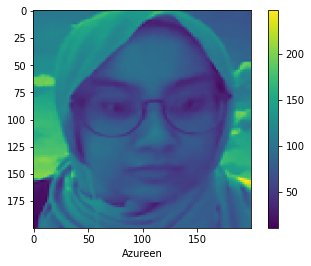

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200), 9)

In [31]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0


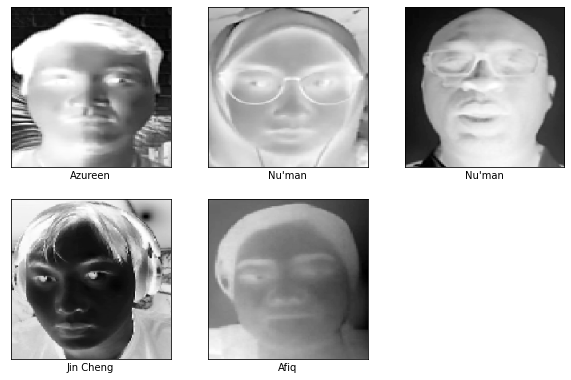

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [34]:
# creating the model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(outputShape),
    # tf.keras.layers.Softmax()
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 128)               5120128   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               1

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
testImages.dtype

dtype('float64')

In [37]:
model.fit(trainImages, trainLabels, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 676ms/step - loss: 2.1843 - accuracy: 0.1364
Epoch 2/20
1/1 [==============================] - 0s 35ms/step - loss: 2.7738 - accuracy: 0.1818
Epoch 3/20
1/1 [==============================] - 0s 35ms/step - loss: 2.3138 - accuracy: 0.2727
Epoch 4/20
1/1 [==============================] - 0s 33ms/step - loss: 2.9213 - accuracy: 0.3182
Epoch 5/20
1/1 [==============================] - 0s 34ms/step - loss: 2.4126 - accuracy: 0.2727
Epoch 6/20
1/1 [==============================] - 0s 35ms/step - loss: 1.9404 - accuracy: 0.3182
Epoch 7/20
1/1 [==============================] - 0s 33ms/step - loss: 1.6139 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 0s 34ms/step - loss: 1.5460 - accuracy: 0.4545
Epoch 9/20
1/1 [==============================] - 0s 33ms/step - loss: 1.4156 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 0s 32ms/step - loss: 1.2289 - accuracy: 0.5909
Epoch 11/20
1/1 [===========

In [38]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

1/1 - 0s - loss: 3.3389 - accuracy: 0.2727 - 171ms/epoch - 171ms/step

Test accuracy: 0.27272728085517883


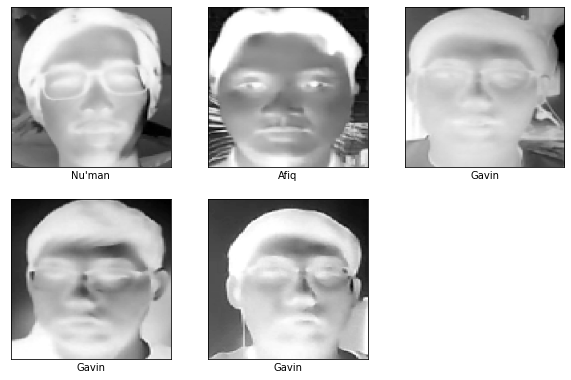

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[testLabels[i]])
plt.show()

In [41]:
predictions = model.predict(testImages)
predictions[0]

array([ 3.0018353,  1.9731429, -2.5851433,  2.8889537, -7.4830217,
        4.43312  ,  1.0790218,  8.504496 ,  6.231031 ], dtype=float32)

In [42]:
probabilityModel = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

predictions = probabilityModel.predict(testImages)
predictions[0]


array([3.6076617e-03, 1.2896451e-03, 1.3515492e-05, 3.2225666e-03,
       1.0085797e-07, 1.5094709e-02, 5.2742235e-04, 8.8511717e-01,
       9.1127113e-02], dtype=float32)

In [43]:

for v in predictions[0]:
    print(f'{v:.2f}', end=', ')

0.00, 0.00, 0.00, 0.00, 0.00, 0.02, 0.00, 0.89, 0.09, 

In [44]:
import os
export_path = ""
modelDir = "tf.model"
version = f"h_{(testAcc*100):.0f}"

exportPath = os.path.join(modelDir,version)

model.save(export_path,save_format='tf')

print('')
exportPath = os.path.join(modelDir, f"{version}.h5")
model.save(exportPath)
print("saved ",exportPath)

INFO:tensorflow:Assets written to: assets

saved  tf.model\h_27.h5


In [45]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(tf.__version__)

maxIterations = 10
testAccList = []
thresholdAcc = 0.90
lastTestAcc = 0.0

model = None
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model'
epochs = 10

for iter in range(maxIterations):
    
    print(f'Simulation {iter+1}/{maxIterations}', end='... ')
    
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=inputShape),
        tf.keras.layers.Dense(128, activation='relu'),
        # tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(outputShape)
    ])

    # model.summary()

    model.compile(optimizer='adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])

    model.fit(trainImages, trainLabels, epochs , verbose=0)

    testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=0)

    testAccList.append(testAcc)

    # print('\ntest accuracy:',testAcc)
    print(f'test accuracy {testAcc}', end='... ')
    

    exportPath = ''

    # Save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        # SavedModel format
        version = f'4_{testAcc*100:.0f}'

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)

        # Save the model
        model.save(exportPath, save_format = 'tf')
        print(f'\nexport path = {exportPath}')

        # HDF5 format
#         exportPath = os.path.join(modelDir, f'{version}.h5')
#         # Save the entire model to a HDF5 file.
#         # The .h5 extension indicates that the model should be saved to HDF5
#         model.save(exportPath)
# #         print('Saved: ', exportPath)
#         print(f'export path {exportPath}', end='')
        

        thresholdAcc = testAcc
        
    print('.')
    

2.7.0
Simulation 1/10... test accuracy 0.09090909361839294... .
Simulation 2/10... test accuracy 0.09090909361839294... .
Simulation 3/10... test accuracy 0.1818181872367859... .
Simulation 4/10... WARNING:tensorflow:5 out of the last 30 calls to <function Model.make_train_function.<locals>.train_function at 0x0000024ECADAFEE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
test accuracy 0.09090909361839294... .
Simulation 5/10... WARNING